### **Exploratory Data Analysis: The Effects of Major Incidents on MTA Subway Ridership from 2020 to 2024**


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 

# Load the dataset
file_path=("/Users/sa3/Portfolio-Project/merged_file.csv")
MTA_merged_file = pd.read_csv("/Users/sa3/Portfolio-Project/merged_file.csv")

### *MTA Incident Type vs. Incident Count (2020-2024):*

The following bar chart shows the frequency of various incident types that occurred within the transit system. The distribution in incidents has challenges that affect both daily ridership and service reliability. 
- Incident types such as "Persons on Trackbed/Police/Medical" occur in case of emergencies, unauthorized persons on the tracks, or for medical issues requiring police or medical attention. These incidents cause severe delays and service disruptions, especially in high-density areas with overcrowding. For example, the number of passengers on platforms during rush hours could raise the potential for medical emergencies or unauthorized access onto the tracks. 
- The next highest incident is listed as "Signals,". This could be as a result of the aged infrastructure, system malfunction, or lack of proper maintenance. New York City runs one of the oldest subway systems worldwide. Larger ridership and usage during all hours of the day and night can easily cause signal breakdowns on an old signaling system that very often results in delayed or partial shutdowns. 
- However, "Track"-related incidents are the least frequent, many of them are due to debris on the tracks, breakdown of mechanical systems, or maintenance/construction processes. Since checking and repair functions on the tracks are routine, their occurrence has a lower number compared to other incidents related to signals. 

This graph shows how the MTA transit system can improve infrastructure, safety measures and maintenance to lower the incident count. 


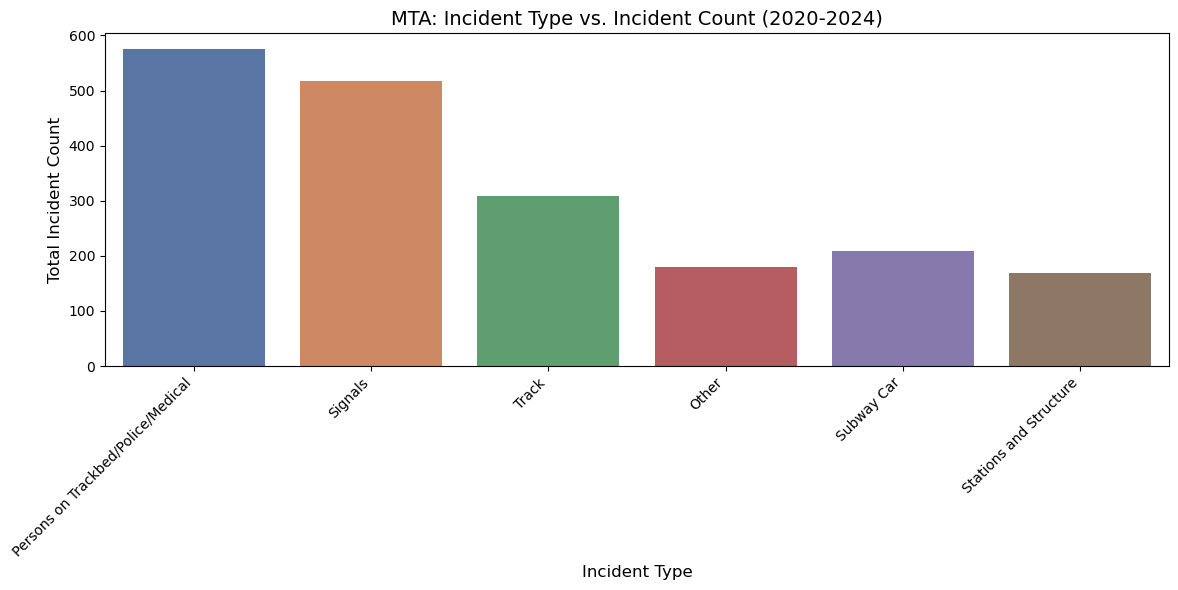

Incident counts per incident type:
incident_type
Persons on Trackbed/Police/Medical    575
Signals                               518
Track                                 308
Subway Car                            209
Other                                 180
Stations and Structure                168
Name: count, dtype: int64


In [11]:
# Date column to datetime format
MTA_merged_file["date"] = pd.to_datetime(MTA_merged_file["date"])

# Incident Type vs Incident Count using Bar Plot 
plt.figure(figsize=(12, 6))
sns.countplot(data=MTA_merged_file, x="incident_type", hue="incident_type", palette="deep")
plt.xticks(rotation=45, ha="right")
plt.title("MTA: Incident Type vs. Incident Count (2020-2024)", fontsize=14)
plt.xlabel("Incident Type", fontsize=12)
plt.ylabel("Total Incident Count", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Count how many incidents there are for each incident type
incident_counts_per_type = MTA_merged_file["incident_type"].value_counts()
print("Incident counts per incident type:")
print(incident_counts_per_type)




### *MTA Subway Major Incidents Over Time (2020-2024):*

Between 2020-2024, incidents ranging from system challenges to more serious issues within the New York Metropolitan Transportation Authority-Subway System have grown gradually. The line graph begins in early 2020, where incident count numbers drastically fell to their lowest point, 5 incidents in March 2020. This could be a result of the initial impact of the COVID-19 pandemic and lockdown. However, this did not last very long because incidents rapidly bounced back by mid-2020 establishing a new starting point with about 30-40 incidents per month for all of 2021 and 2022. Moving into 2024, the incident count showed signs of no improvement when it exceeded 45 incidents on average every month. Eventually reaching 52 incidents in January 2025, indicates there are systemic challenges that need to be improved in New York's transit policies. Looking over the year-by-year comparisons, each year averaged higher incident counts than the last, with the most dramatic increase between 2023 and 2024. This is a persistent upward trend that raises critical questions about the capacity of the system to handle its current operational demands. This trend of increasing incidents, especially in the last few months, might call for a review of the maintenance strategy and infrastructure investment.


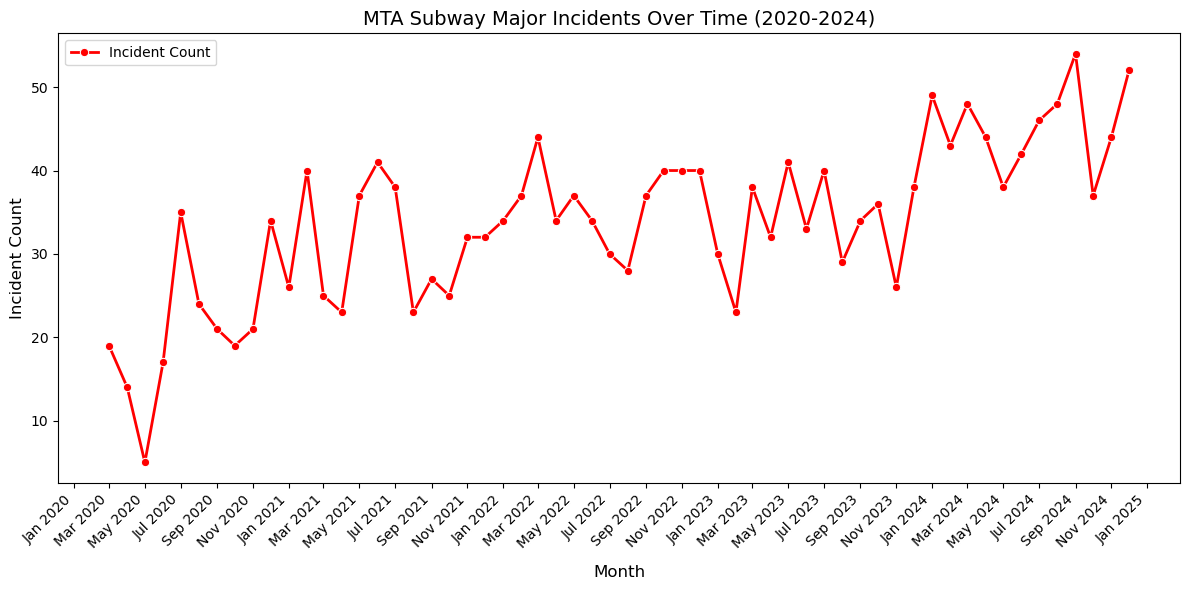

In [12]:
# MTA Major Incident Trends Over Time (2020-2025) using a Line Plot
plt.figure(figsize=(12, 6))

# Aggregating incidents by date
incident_trends = MTA_merged_file.groupby("date").size().reset_index(name="incident_count")

# Incident trends represented with red line and markers
sns.lineplot(data=incident_trends, x="date", y="incident_count", color="red", marker="o", linewidth=2, label="Incident Count", errorbar=None)

# Set x-axis to show months and align text properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # 'Jan 2020', 'Feb 2020', and so on.
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
plt.xticks(rotation=45, ha="right")

# Labels and title on line graph
plt.xlabel("Month", fontsize=12, labelpad=10)
plt.ylabel("Incident Count", fontsize=12)
plt.title("MTA Subway Major Incidents Over Time (2020-2024)", fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

### *MTA Subway Estimated Ridership Trends (2020-2024):*

MTA Subway ridership from 2020 to early 2025 shows an interesting recovery of the New York City public transit system. The number stood at around 2.2 million riders in the beginning but  during the pre-pandemic period in early 2020 it reduced to 500,000 riders during the first COVID-19 lockdown. It then entered a very prolonged period of gradual recovery through late 2020 and 2021, where ridership was growing but showed high unpredictability. Around January 2022,  ridership started to consistently break above 3 million riders, which could be interpreted as the focal point to the recovery phase. The data continues with a pattern of ups and downs, peaking during busy commutes months and showing troughs during holiday periods from 2022 through 2024. Also throughout the dataset, there are consistent winter dips occurring between December and February of each year. These winter declines caused ridership to drop between 500,000 to 1 million passengers compared to peak months. For example, the winter of 2022-2023 shows a sharp decrease from approximately 3.5 million to 2.5 million riders, a pattern that repeats in the other winters. Summer vacation periods experience this as well but they are not as severe. The system reaches several post-pandemic peaks approaching 4 million riders in 2024, especially during spring and fall months, followed by the unusually winter ridership decline. This cyclical pattern suggests a combination of factors affecting ridership, including weather conditions, holiday periods, and academic calendars. Pre-pandemic recovery that was significant but incomplete.


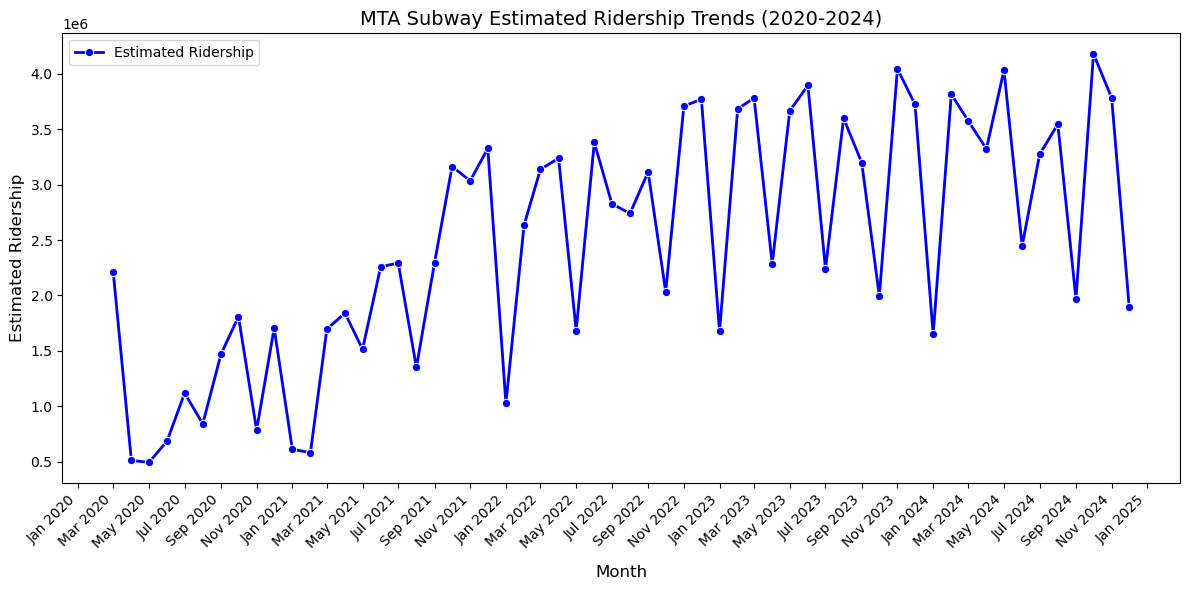

In [13]:
#Subway Ridership Trends Over Time (2020-2025) using a Line Plot
plt.figure(figsize=(12, 6))

# Subway ridership trends represneted with a blue line and markers
sns.lineplot(data=MTA_merged_file, x="date", y="subways_total_estimated_ridership",color="blue", marker="o", linewidth=2, label="Estimated Ridership")

# Set x-axis to show months and align text properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # 'Jan 2020', 'Feb 2020' and so on.
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
plt.xticks(rotation=45, ha="right") 

# Labels and title
plt.xlabel("Month", fontsize=12, labelpad=10)
plt.ylabel("Estimated Ridership", fontsize=12)
plt.title("MTA Subway Estimated Ridership Trends (2020-2024)", fontsize=14)

plt.tight_layout()
plt.show()

### *Total Incident Count by Top 10 Train Lines (2020-2024):*

This graph shows the frequency of incidents on the MTA subway lines for the top 10 train lines between 2020 and 2024. The 6 line and N line have had the most incidents, with over 200 incidents each within this period. Next is the 2 line, which shows close to 190 incidents. Followed by both E and F averaging around 175 incidents. Then 7 and 4 lines with about 170 incidents each. At this point, we can see that there is a stabilization in the incidence frequencies. The 5 line has an incident count significantly lower with  around 150 incidents, while the R and 1 lines show the least amount of incidents with around 140 incidents. The 6 line is the busiest train line in New York City, which accounts for the high number of incidents. The 1 line train is the second busiest route but shows comparatively lower incident counts, probably because of more effective maintenance protocols or newer infrastructure on these routes. The 6 line train along with the others can effectively lower the incident count by implementing more maintenance and renovations. 



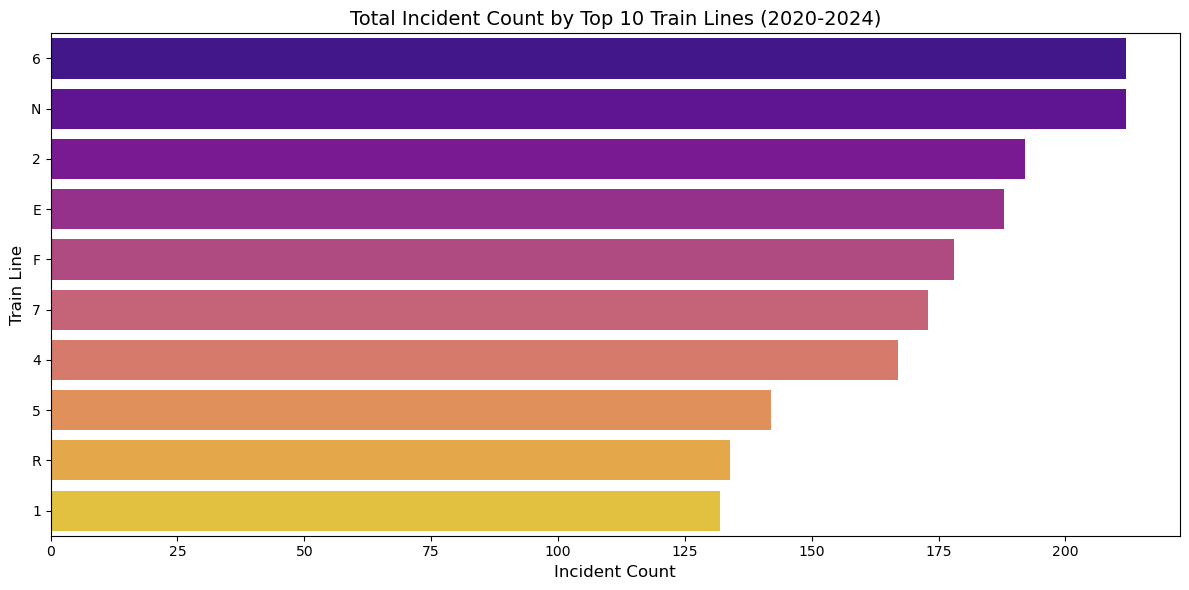

In [14]:
# Combine total incidents per train line over the period
MTA_merged_file["train_line"] = MTA_merged_file["train_line"].astype(str)
train_line_totals = MTA_merged_file.groupby('train_line')['incident_count'].sum().reset_index()

# Sort the train lines by incident count in descending order
train_line_totals = train_line_totals.sort_values("incident_count", ascending=False)

# Select only the top 10 train lines with the highest incident count
top_train_lines = train_line_totals.head(10)

# Horizontal bar plot for better visualization of the top 10 train lines
plt.figure(figsize=(12, 6))
sns.barplot(x="incident_count", y= "train_line", data=top_train_lines, hue= "train_line", palette='plasma')
plt.title("Total Incident Count by Top 10 Train Lines (2020-2024)", fontsize=14)
plt.xlabel("Incident Count", fontsize=12)
plt.ylabel("Train Line", fontsize=12)
plt.tight_layout()
plt.show()


### *Summary:*

The MTA system experiences incidents that contribute to ridership due to delays, service disruptions, and safety concerns. High-frequency incidents such as  "Persons on Trackbed/Police/Medical" cause a severe service disruption in overcrowded areas causing  delays. Also, signals issues from aging infrastructure and poor maintenance causes disruptions in service. The increase of incidents between 2020-2025 has increased gradually, with the most significant increase between 2023 and 2024. There is work to be done to maintain and invest in more effective transit policies for greater reliability and comfort among riders.
